In [1]:
# STEP 0: Setup environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# optional untuk visualisasi radar
!pip install plotly
import plotly.express as px


In [2]:
# STEP 1: Load dataset
sheet_url = "https://docs.google.com/spreadsheets/d/1BuOG4dbw8zy6z36W41qyhOblG3UkscPFSehcRQjOtC4/export?format=csv&gid=1987055282"
df = pd.read_csv(sheet_url)
df.head()


,employee_id,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months
0,EMP100000,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64
1,EMP100001,Wulan Setiawan,476388,4,4,4,5,5,3,1,1,2,16
2,EMP100002,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58
3,EMP100003,Oka Halim,751615,1,3,4,2,1,1,2,2,5,15
4,EMP100004,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34


In [3]:
# Lihat kolom dan tipe datanya
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   employee_id              2010 non-null   object
 1   fullname                 2010 non-null   object
 2   nip                      2010 non-null   int64 
 3   company_id               2010 non-null   int64 
 4   area_id                  2010 non-null   int64 
 5   position_id              2010 non-null   int64 
 6   department_id            2010 non-null   int64 
 7   division_id              2010 non-null   int64 
 8   directorate_id           2010 non-null   int64 
 9   grade_id                 2010 non-null   int64 
 10  education_id             2010 non-null   int64 
 11  major_id                 2010 non-null   int64 
 12  years_of_service_months  2010 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 204.3+ KB


,employee_id,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months
count,2010,2010,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000
unique,2010,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,DUP3452,Fitri Anugrah Subekti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,550175.979104,2.498010,2.468159,3.502985,3.527363,3.032836,2.034826,1.997512,2.464677,3.519900,50.124378
std,NaN,NaN,259332.684478,1.108924,1.132897,1.682706,1.680414,1.409248,0.814736,0.818826,1.107015,1.687612,25.181580
min,NaN,NaN,100945.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,NaN,NaN,325784.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,32.000000
50%,NaN,NaN,540371.000000,2.000000,2.000000,4.000000,4.000000,3.000000,2.000000,2.000000,2.000000,3.000000,50.000000
75%,NaN,NaN,776277.250000,3.000000,3.000000,5.000000,5.000000,4.000000,3.000000,3.000000,3.000000,5.000000,66.000000


In [8]:
import pandas as pd

# 1. Load profiles_psych (ganti gid sesuai sheet-mu)
profiles_url = "https://docs.google.com/spreadsheets/d/1BuOG4dbw8zy6z36W41qyhOblG3UkscPFSehcRQjOtC4/export?format=csv&gid=711778799#gid=711778799"
profiles = pd.read_csv(profiles_url)

# 2. Load performance_yearly
performance_url = "https://docs.google.com/spreadsheets/d/1BuOG4dbw8zy6z36W41qyhOblG3UkscPFSehcRQjOtC4/export?format=csv&gid=422937119#gid=422937119"
performance = pd.read_csv(performance_url)

# 3. Cek struktur
print("Profiles:", profiles.columns)
print("Performance:", performance.columns)


Profiles: Index(['employee_id', 'pauli', 'faxtor', 'disc', 'disc_word', 'mbti', 'iq',
       'gtq', 'tiki'],
      dtype='object')
Performance: Index(['employee_id', 'rating', 'year'], dtype='object')


In [9]:
profiles.head()
performance.head()


,employee_id,rating,year
0,EMP100000,2.0,2021
1,EMP100001,NaN,2021
2,EMP100002,2.0,2021
3,EMP100003,NaN,2021
4,EMP100004,3.0,2021


Index(['employee_id', 'pauli', 'faxtor', 'disc', 'disc_word', 'mbti', 'iq',
       'gtq', 'tiki', 'rating', 'year'],
      dtype='object')


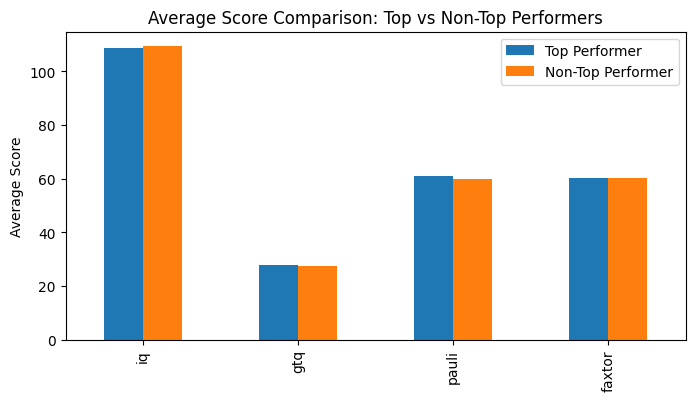

,Top Performer,Non-Top Performer
iq,108.834337,109.354388
gtq,27.854772,27.406338
pauli,60.900114,59.786221
faxtor,60.198638,60.314762


In [11]:
# Gabungkan profiles_psych dengan performance_yearly
merged = profiles.merge(performance, on='employee_id', how='left')

# Cek apakah kolom rating ada
print(merged.columns)

# Pisahkan top performer (rating 5)
top = merged[merged['rating'] == 5]
non_top = merged[merged['rating'] < 5]

# Pilih kolom numerik sesuai dataset kamu
cols = ['iq', 'gtq', 'pauli', 'faxtor']

# Hitung rata-rata skor
compare_df = pd.DataFrame({
    'Top Performer': top[cols].mean(),
    'Non-Top Performer': non_top[cols].mean()
})

# Visualisasi hasil
compare_df.plot(kind='bar', figsize=(8,4), title='Average Score Comparison: Top vs Non-Top Performers', ylabel='Average Score')
plt.show()

compare_df


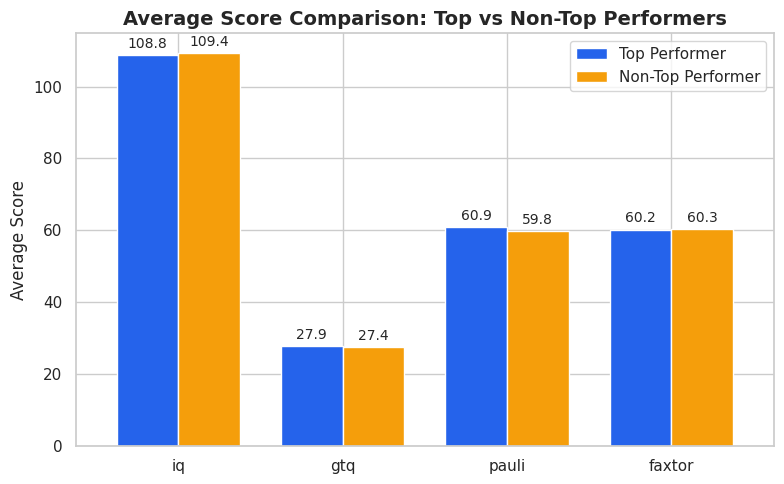

,Top Performer,Non-Top Performer,Gap,% Difference
iq,108.8,109.4,-0.5,-0.5%
gtq,27.9,27.4,0.4,1.6%
pauli,60.9,59.8,1.1,1.9%
faxtor,60.2,60.3,-0.1,-0.2%


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Pilih kolom numerik yang ingin dibandingkan
cols = ['iq', 'gtq', 'pauli', 'faxtor']

# Buat dataframe perbandingan
compare_df = pd.DataFrame({
    'Top Performer': top[cols].mean(),
    'Non-Top Performer': non_top[cols].mean()
})

# Hitung selisih (gap) dan persentase perbedaan
compare_df['Gap'] = compare_df['Top Performer'] - compare_df['Non-Top Performer']
compare_df['% Difference'] = (
    (compare_df['Gap'] / compare_df['Non-Top Performer']) * 100
).round(1)

# --- VISUALISASI GRAFIK ---
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8,5))
bar_colors = ["#2563EB", "#F59E0B"]  # biru dan oranye natural

# Plot bar
compare_df[['Top Performer','Non-Top Performer']].plot(kind='bar', ax=ax, color=bar_colors, width=0.75)

# Styling
plt.title("Average Score Comparison: Top vs Non-Top Performers", fontsize=14, weight='bold')
plt.ylabel("Average Score", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.legend(title="", fontsize=11)

# Tambahkan nilai di atas bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

# --- TABEL RINGKAS ---
styled = compare_df.style.set_caption("Detailed Comparison Table") \
    .format({'Top Performer':'{:.1f}', 'Non-Top Performer':'{:.1f}', 'Gap':'{:.1f}', '% Difference':'{:.1f}%'}) \
    .background_gradient(subset=['% Difference'], cmap='Blues') \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('font-size', '13px'), ('font-weight', 'bold'), ('color', '#333')]
    }])
styled


behavioral

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 1️⃣ Load dataset
competencies_url = "https://docs.google.com/spreadsheets/d/1BuOG4dbw8zy6z36W41qyhOblG3UkscPFSehcRQjOtC4/export?format=csv&gid=1869276144"
pillars_url = "https://docs.google.com/spreadsheets/d/1BuOG4dbw8zy6z36W41qyhOblG3UkscPFSehcRQjOtC4/export?format=csv&gid=529773708"

competencies = pd.read_csv(competencies_url)
pillars = pd.read_csv(pillars_url)
performance = pd.read_csv("https://docs.google.com/spreadsheets/d/1BuOG4dbw8zy6z36W41qyhOblG3UkscPFSehcRQjOtC4/export?format=csv&gid=422937119")

# 2️⃣ Gabungkan dataset
merged_comp = competencies.merge(performance, on='employee_id', how='left') \
                          .merge(pillars, on='pillar_code', how='left')

# 3️⃣ Hitung rata-rata per pilar
avg_pillar = merged_comp.groupby(['pillar_name', 'rating'])['pillar_score'].mean().reset_index()

# 4️⃣ Pivot agar siap buat heatmap
pivot = avg_pillar.pivot(index='pillar_name', columns='rating', values='pillar_score')

# 5️⃣ Visualisasi heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.title("Average Competency Pillar Scores by Performance Rating")
plt.ylabel("")
plt.xlabel("Performance Rating")
plt.show()

# 6️⃣ Radar chart Top vs Non-Top
top_scores = avg_pillar[avg_pillar['rating']==5].set_index('pillar_name')['pillar_score']
non_scores = avg_pillar[avg_pillar['rating']<5].groupby('pillar_name')['pillar_score'].mean()

radar_df = pd.DataFrame({
    'Pillar': top_scores.index,
    'Top Performer': top_scores.values,
    'Non-Top Performer': non_scores.values
})

fig = px.line_polar(radar_df, r='Top Performer', theta='Pillar', line_close=True,
                    color_discrete_sequence=['#2563EB'], name='Top Performer')
fig.add_scatterpolar(r=radar_df['Non-Top Performer'], theta=radar_df['Pillar'],
                     line_close=True, name='Non-Top Performer',
                     line_color='#F59E0B')
fig.update_layout(title="Competency Pillars Radar Chart", showlegend=True)
fig.show()


KeyError: 'pillar_name'

In [20]:
fig = px.line_polar(
    radar_df,
    r='Top Performer',
    theta='Pillar',
    line_close=True,
    color_discrete_sequence=['#2563EB']
)

# Tambahkan garis Non-Top Performer
fig.add_scatterpolar(
    r=radar_df['Non-Top Performer'],
    theta=radar_df['Pillar'],
    name='Non-Top Performer',
    line_color='#F59E0B'
)

fig.update_layout(
    title="Competency Pillars Radar Chart",
    showlegend=True
)

fig.show()


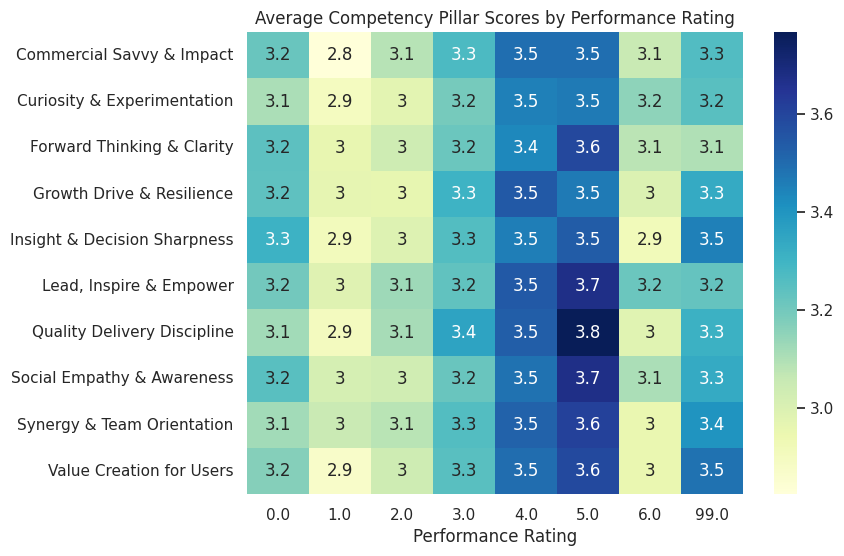

TypeError: line_polar() got an unexpected keyword argument 'name'

In [21]:
# 2️⃣ Gabungkan dataset
merged_comp = competencies.merge(performance, on='employee_id', how='left') \
                          .merge(pillars, on='pillar_code', how='left')

# 3️⃣ Hitung rata-rata per pilar
avg_pillar = merged_comp.groupby(['pillar_label', 'rating'])['score'].mean().reset_index()

# 4️⃣ Pivot agar siap buat heatmap
pivot = avg_pillar.pivot(index='pillar_label', columns='rating', values='score')

# 5️⃣ Visualisasi heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.title("Average Competency Pillar Scores by Performance Rating")
plt.ylabel("")
plt.xlabel("Performance Rating")
plt.show()

# 6️⃣ Radar chart Top vs Non-Top
top_scores = avg_pillar[avg_pillar['rating']==5].set_index('pillar_label')['score']
non_scores = avg_pillar[avg_pillar['rating']<5].groupby('pillar_label')['score'].mean()

radar_df = pd.DataFrame({
    'Pillar': top_scores.index,
    'Top Performer': top_scores.values,
    'Non-Top Performer': non_scores.values
})

fig = px.line_polar(radar_df, r='Top Performer', theta='Pillar', line_close=True,
                    color_discrete_sequence=['#2563EB'], name='Top Performer')
fig.add_scatterpolar(r=radar_df['Non-Top Performer'], theta=radar_df['Pillar'],
                     line_close=True, name='Non-Top Performer',
                     line_color='#F59E0B')
fig.update_layout(title="Competency Pillars Radar Chart", showlegend=True)
fig.show()


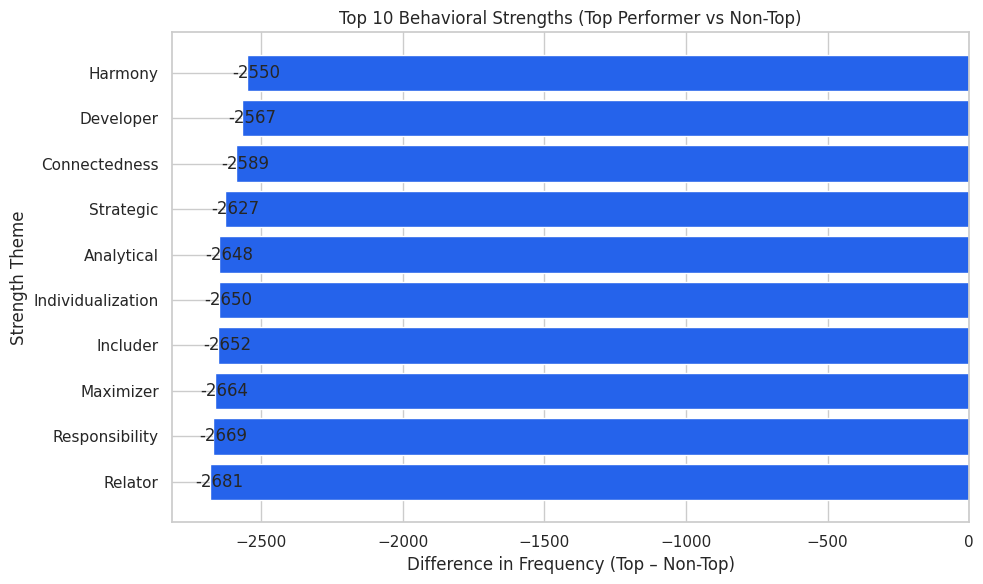

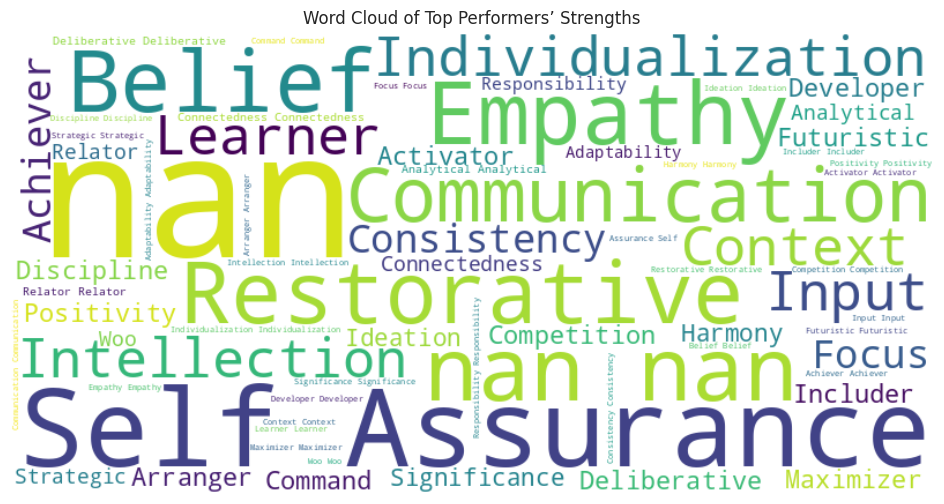

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load datasets
strengths_url = "https://docs.google.com/spreadsheets/d/1BuOG4dbw8zy6z36W41qyhOblG3UkscPFSehcRQjOtC4/export?format=csv&gid=1837550471"
performance_url = "https://docs.google.com/spreadsheets/d/1BuOG4dbw8zy6z36W41qyhOblG3UkscPFSehcRQjOtC4/export?format=csv&gid=422937119"

strengths = pd.read_csv(strengths_url)
performance = pd.read_csv(performance_url)

# Merge data
merged = strengths.merge(performance[['employee_id','rating']], on='employee_id', how='left')

# Separate groups
top = merged[merged['rating'] == 5]
non_top = merged[merged['rating'] < 5]

# Count theme frequencies
top_counts = top['theme'].value_counts().reset_index()
non_counts = non_top['theme'].value_counts().reset_index()
top_counts.columns = ['theme', 'count_top']
non_counts.columns = ['theme', 'count_non']

# Merge frequencies
merged_counts = pd.merge(top_counts, non_counts, on='theme', how='outer').fillna(0)
merged_counts['diff'] = merged_counts['count_top'] - merged_counts['count_non']

# Select top 10 themes with highest positive diff
top10 = merged_counts.sort_values(by='diff', ascending=False).head(10)

# Bar chart
plt.figure(figsize=(10,6))
plt.barh(top10['theme'], top10['diff'], color='#2563EB')
plt.gca().invert_yaxis()
plt.title("Top 10 Behavioral Strengths (Top Performer vs Non-Top)")
plt.xlabel("Difference in Frequency (Top – Non-Top)")
plt.ylabel("Strength Theme")
for i, val in enumerate(top10['diff']):
    plt.text(val + (0.02*max(top10['diff'])), i, f"{int(val)}", va='center')
plt.tight_layout()
plt.show()

# Word cloud for Top Performers
text = " ".join(top['theme'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap='viridis').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Top Performers’ Strengths")
plt.show()


streamlit

In [24]:
!pip install streamlit plotly pandas matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.3 MB/s eta 0:00:00


In [25]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px

st.set_page_config(page_title="AI Talent Success Dashboard", layout="wide")
st.title("💡 AI Talent Success Dashboard")

# === INPUT FORM ===
st.header("1️⃣ Role Information")
role_name = st.text_input("Role Name", placeholder="e.g. Marketing Manager")
job_level = st.selectbox("Job Level", ["Intern", "Junior", "Mid", "Senior", "Manager", "Director"])
role_purpose = st.text_area("Role Purpose", placeholder="1–2 sentences to describe role outcome")

benchmark_ids = st.multiselect("Select Employee Benchmarking (max 3)",
                               ["E001","E002","E003","E004","E005"])

if st.button("Generate Job Description & Variable Score"):
    # 1️⃣ Load data (contoh via Google Sheets)
    profiles_url = "https://docs.google.com/spreadsheets/d/1BuOG4dbw8zy6z36W41qyhOblG3UkscPFSehcRQjOtC4/export?format=csv&gid=711778799"
    performance_url = "https://docs.google.com/spreadsheets/d/1BuOG4dbw8zy6z36W41qyhOblG3UkscPFSehcRQjOtC4/export?format=csv&gid=422937119"

    profiles = pd.read_csv(profiles_url)
    performance = pd.read_csv(performance_url)

    # 2️⃣ Dynamic Benchmark
    benchmark = profiles[profiles["employee_id"].isin(benchmark_ids)].mean(numeric_only=True)
    profiles["cognitive_match"] = 1 - abs(profiles["iq"] - benchmark["iq"]) / benchmark["iq"]
    profiles["gtq_match"] = 1 - abs(profiles["gtq"] - benchmark["gtq"]) / benchmark["gtq"]
    profiles["success_score"] = 0.5 * profiles["cognitive_match"] + 0.5 * profiles["gtq_match"]

    # 3️⃣ Visualization
    st.subheader("2️⃣ Success Score Distribution")
    fig = px.histogram(profiles, x="success_score", nbins=20, title="Success Score Distribution", color_discrete_sequence=['#2563EB'])
    st.plotly_chart(fig, use_container_width=True)

    st.subheader("3️⃣ Top Aligned Employees")
    top10 = profiles.sort_values("success_score", ascending=False).head(10)
    st.dataframe(top10[["employee_id", "iq", "gtq", "success_score"]])

    st.subheader("4️⃣ Narrative Insight")
    top3 = top10.head(3)
    st.markdown(f"For the role **{role_name} ({job_level})**, top aligned employees are:")
    for _, row in top3.iterrows():
        st.markdown(f"- `{row['employee_id']}` — SuccessScore: **{row['success_score']:.3f}**")


Writing app.py
